# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [44]:
#Categorías
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [45]:
#Generar 2 colecciones de gender, y dos de incomes con 500 observaciones
n = 500
gender_data =[]
income_data =[]

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [46]:
#Creando más variables
#N (m, s) -> m + s * Z
height = 160 + 10 * np.random.randn(n) #Media, desviación, número de observaciones
weight = 65 +25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [54]:
#Creando DataFrame a partir de campos creados
data = pd.DataFrame({'Gender':gender_data,
                     'Economic status': income_data,
                     'Height': height,
                      'Weight': weight,
                      'Age': age,
                      'Income': income})

#Formato a columnas 
data[['Age', 'Height', 'Weight']] =  data[['Age', 'Height', 'Weight']].astype(int)
pd.options.display.float_format = '{:,.1f}'.format  #El 1 representa el número de decimales

In [55]:
data.head()

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Poor,170,34,43,"26,491.0"
1,Male,Middle Class,156,52,50,"14,328.7"
2,Female,Middle Class,162,85,33,"16,036.8"
3,Male,Middle Class,148,68,16,"19,007.1"
4,Female,Rich,166,66,11,"18,322.2"


### Agrupación de datos

In [56]:
#Método 1 (Groups)
grouped_gender = data.groupby('Gender')
grouped_gender.groups  #Indica a que fila pertenece cada variable categórica

{'Female': Int64Index([  2,   4,   5,   8,   9,  12,  13,  14,  15,  18,
             ...
             479, 480, 482, 485, 486, 493, 494, 496, 497, 498],
            dtype='int64', length=244),
 'Male': Int64Index([  0,   1,   3,   6,   7,  10,  11,  16,  17,  19,
             ...
             483, 484, 487, 488, 489, 490, 491, 492, 495, 499],
            dtype='int64', length=256)}

In [57]:
# Imprimir los agrupadores declarados en GROUPED
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic status  Height  Weight  Age   Income
2    Female    Middle Class     162      85   33 16,036.8
4    Female            Rich     166      66   11 18,322.2
5    Female            Poor     158      60   41 20,071.4
8    Female            Poor     150      52   29 25,278.1
9    Female            Poor     140      35   54 23,768.8
12   Female            Rich     165      60    7 17,275.1
13   Female            Rich     164      69   32 16,283.4
14   Female    Middle Class     157      64   40 19,201.1
15   Female    Middle Class     153      63   24 21,323.1
18   Female            Rich     152      94   43 13,212.3
20   Female    Middle Class     155      33   38 18,940.3
29   Female            Poor     164      81   23 10,964.8
33   Female            Poor     165      31   14 15,898.3
35   Female    Middle Class     152      18   22 18,743.2
36   Female            Poor     159      54   42 24,162.6
37   Female            Poor     143     116   37 24,395.5
40   Fe

In [59]:
#Agrupar y filtrar solo por mujeres
grouped_gender.get_group('Female').head()

,Gender,Economic status,Height,Weight,Age,Income
2,Female,Middle Class,162,85,33,"16,036.8"
4,Female,Rich,166,66,11,"18,322.2"
5,Female,Poor,158,60,41,"20,071.4"
8,Female,Poor,150,52,29,"25,278.1"
9,Female,Poor,140,35,54,"23,768.8"


### Doble agrupación

In [61]:
#Agrupando por género y estatus económico
double_group = data.groupby(['Gender', 'Economic status'])

In [62]:
#Longitud del agrupador (El resultado son 6 grupos diferentes)
len(double_group)

6

In [74]:
double_group.head(1) #Primer grupo (Todos los géneros y estatus económicos)

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Poor,170,34,43,"26,491.0"
1,Male,Middle Class,156,52,50,"14,328.7"
2,Female,Middle Class,162,85,33,"16,036.8"
4,Female,Rich,166,66,11,"18,322.2"
5,Female,Poor,158,60,41,"20,071.4"
6,Male,Rich,160,27,32,"20,247.5"


In [63]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic status  Height  Weight  Age   Income
2    Female    Middle Class     162      85   33 16,036.8
14   Female    Middle Class     157      64   40 19,201.1
15   Female    Middle Class     153      63   24 21,323.1
20   Female    Middle Class     155      33   38 18,940.3
35   Female    Middle Class     152      18   22 18,743.2
40   Female    Middle Class     150      48   49 18,334.6
42   Female    Middle Class     161      41   33 19,300.5
45   Female    Middle Class     167      40   43 16,604.3
64   Female    Middle Class     161      70   50 22,140.0
66   Female    Middle Class     155      91   22 21,368.6
79   Female    Middle Class     164      97    9 17,214.8
83   Female    Middle Class     156      79   23 19,287.4
91   Female    Middle Class     168      88   25 16,940.6
93   Female    Middle Class     175      87   23 21,041.5
94   Female    Middle Class     153      52   25 19,527.2
97   Female    Middle Class     148      35  

### Operaciones sobre agrupadores dobles (dos campos que agrupan)

In [66]:
#Sumar los valores (Suma todos los valores)
double_group.sum()

Height  Weight   Age      Income
Gender Economic status                                  
Female Middle Class      13761    5905  2496 1,621,261.8
       Poor              13840    5852  2618 1,587,681.5
       Rich              11391    4678  2057 1,259,235.2
Male   Middle Class      13892    5930  2614 1,617,216.5
       Poor              13234    5214  2266 1,460,784.8
       Rich              13578    5774  2521 1,539,458.4

In [67]:
#Promediar los valores (Promedia todos los valores)
double_group.mean()

Height  Weight  Age   Income
Gender Economic status                              
Female Middle Class      160.0    68.7 29.0 18,851.9
       Poor              160.9    68.0 30.4 18,461.4
       Rich              158.2    65.0 28.6 17,489.4
Male   Middle Class      159.7    68.2 30.0 18,588.7
       Poor              159.4    62.8 27.3 17,599.8
       Rich              157.9    67.1 29.3 17,900.7

In [68]:
#Tamaño los valores (Cuantos elementos en cada agregación)
double_group.size()

Gender  Economic status
Female  Middle Class       86
        Poor               86
        Rich               72
Male    Middle Class       87
        Poor               83
        Rich               86
dtype: int64

In [69]:
#Estadísticas básicas
double_group.describe()

Age                                    Height        \
                       count mean  std  min  25%  50%  75%  max  count  mean   
Gender Economic status                                                         
Female Middle Class     86.0 29.0 11.4  0.0 22.0 28.0 38.0 57.0   86.0 160.0   
       Poor             86.0 30.4 10.7  1.0 24.0 31.0 37.8 55.0   86.0 160.9   
       Rich             72.0 28.6 10.6  4.0 21.0 29.0 35.2 56.0   72.0 158.2   
Male   Middle Class     87.0 30.0 11.7  7.0 21.5 29.0 37.0 60.0   87.0 159.7   
       Poor             83.0 27.3 13.1 -1.0 19.0 27.0 38.0 54.0   83.0 159.4   
       Rich             86.0 29.3 11.1 -1.0 23.0 30.0 38.0 51.0   86.0 157.9   

                        ...    Income          Weight                       \
                        ...       75%      max  count mean  std   min  25%   
Gender Economic status  ...                                                  
Female Middle Class     ...  21,063.7 25,812.8   86.0 68.7 24.2  18.0 52.5   
       Poor             ...  20,883.5 26,503.3   86.0 68.0 26.2   5.0 52.0   
       Rich             ...  19,394.1 25,883.6   72.0 65.0 25.1   6.0 46.8   
Male   Middle Class     ...  20,495.1 26,112.3   87.0 68.2 23.2  14.0 51.5   
       Poor             ...  19,878.2 27,397.1   83.0 62.8 28.3 -30.0 43.5   
       Rich             ...  20,267.4 27,070.1   86.0 67.1 24.1  25.0 49.0   

                                        
                        50%  75%   max  
Gender Economic status                  
Female Middle Class    66.0 85.0 122.0  
       Poor            67.5 83.0 144.0  
       Rich            68.0 81.0 120.0  
Male   Middle Class    70.0 80.5 133.0  
       Poor            63.0 78.5 134.0  
       Rich            66.0 78.8 134.0  

[6 rows x 32 columns]

In [71]:
#Seleccionar solo una variable para estudiar
grouped_income = double_group['Income']
grouped_income.describe()

count     mean     std      min      25%      50%  \
Gender Economic status                                                      
Female Middle Class      86.0 18,851.9 3,173.8  8,934.1 17,133.3 18,854.6   
       Poor              86.0 18,461.4 3,763.2  6,685.3 16,222.6 18,411.9   
       Rich              72.0 17,489.4 3,557.1  8,659.1 15,579.0 17,325.0   
Male   Middle Class      87.0 18,588.7 3,312.9 10,283.9 16,321.2 18,991.3   
       Poor              83.0 17,599.8 3,697.3  8,610.3 15,028.9 17,325.9   
       Rich              86.0 17,900.7 3,681.9  8,742.2 15,460.2 17,926.2   

                            75%      max  
Gender Economic status                    
Female Middle Class    21,063.7 25,812.8  
       Poor            20,883.5 26,503.3  
       Rich            19,394.1 25,883.6  
Male   Middle Class    20,495.1 26,112.3  
       Poor            19,878.2 27,397.1  
       Rich            20,267.4 27,070.1

In [72]:
#Método 2 (Aggregate) para seleccionar diferentes operaciones en datos agrupados

double_group.aggregate({
    'Income':np.sum,     # Suma de ingresos
    'Age':np.mean,       # Media de las edades
    'Height':np.std      # Desviación estándar de la estatura
})

Income  Age  Height
Gender Economic status                         
Female Middle Class    1,621,261.8 29.0    10.1
       Poor            1,587,681.5 30.4    10.6
       Rich            1,259,235.2 28.6    10.6
Male   Middle Class    1,617,216.5 30.0    10.3
       Poor            1,460,784.8 27.3     7.8
       Rich            1,539,458.4 29.3    11.7

In [75]:
#Método 3 (Aggregate) para seleccionar diferentes operaciones en datos agrupados

double_group.aggregate({
    'Age':np.mean,       # Media de las edades
    'Height':lambda h:np.mean(h)/np.std(h)      #divide las medias de la altura entre su desviación estándar (Otra manera de calcular el promedio)
                                           
})

Age  Height
Gender Economic status             
Female Middle Class    29.0    15.9
       Poor            30.4    15.2
       Rich            28.6    15.0
Male   Middle Class    30.0    15.5
       Poor            27.3    20.6
       Rich            29.3    13.6

In [76]:
#Método 4 (Aggregate) para todas las columnas con las operaciones indicadas

double_group.aggregate({np.sum, np.mean, np.std})

Height             Weight             Age             \
                         mean    sum  std   mean   sum  std mean   sum  std   
Gender Economic status                                                        
Female Middle Class     160.0  13761 10.1   68.7  5905 24.2 29.0  2496 11.4   
       Poor             160.9  13840 10.6   68.0  5852 26.2 30.4  2618 10.7   
       Rich             158.2  11391 10.6   65.0  4678 25.1 28.6  2057 10.6   
Male   Middle Class     159.7  13892 10.3   68.2  5930 23.2 30.0  2614 11.7   
       Poor             159.4  13234  7.8   62.8  5214 28.3 27.3  2266 13.1   
       Rich             157.9  13578 11.7   67.1  5774 24.1 29.3  2521 11.1   

                         Income                      
                           mean         sum     std  
Gender Economic status                               
Female Middle Class    18,851.9 1,621,261.8 3,173.8  
       Poor            18,461.4 1,587,681.5 3,763.2  
       Rich            17,489.4 1,259,235.2 3,557.1  
Male   Middle Class    18,588.7 1,617,216.5 3,312.9  
       Poor            17,599.8 1,460,784.8 3,697.3  
       Rich            17,900.7 1,539,458.4 3,681.9

# Filtrado de datos

In [78]:
#La suma de todos los elementos, sea mayor a 2400 y que pertenecen a edad
double_group['Age'].filter(lambda x: x.sum()>2400)

1      50
2      33
3      16
5      41
6      32
8      29
9      54
10     29
14     40
15     24
16     50
17     30
19     27
20     38
22     38
23     30
25     33
26     21
27     34
29     23
30     -1
31     45
32     38
33     14
34     38
35     22
36     42
37     37
39     19
40     49
       ..
460    21
461    42
462    15
466    32
467     8
469    21
470    19
471    33
472    45
473    24
474    25
475    23
476    45
479    25
481    37
482    14
484    33
485    35
486    23
487    40
488    22
489    19
490    43
491    26
492    39
494    17
496    31
497    22
498    33
499    26
Name: Age, Length: 345, dtype: int32

# Transformación de variables

### Método transform

In [83]:
#Calcular un Z Score
zscore = lambda x: (x-x.mean())/x.std()

In [89]:
# Transformar el dataframe agrupado, aplicando Zscore
zgroup =double_group.transform(zscore)  #Normalizar

In [86]:
import matplotlib.pyplot as plt

(array([  7.,  14.,  43.,  68., 109.,  98.,  74.,  57.,  22.,   8.]),
 array([-2.74825114, -2.21548799, -1.68272483, -1.14996168, -0.61719853,
        -0.08443537,  0.44832778,  0.98109094,  1.51385409,  2.04661724,
         2.5793804 ]),
 <a list of 10 Patch objects>)

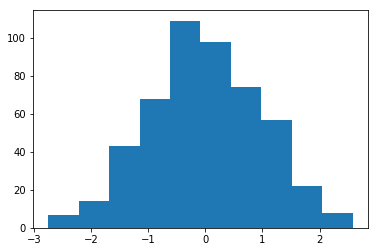

In [91]:
#Creando histograma de la columna "Age"
plt.hist(zgroup['Age'])

### Usando la función "Transform" para rellenar datos con la media

In [92]:
#Declarar relleno
fill_na_mean = lambda x: x.fillna(x.mean())

In [94]:
#Aplicar transformación rellenando con la media de X [columna dónde se aplica]
double_group.transform(fill_na_mean).head()

,Height,Weight,Age,Income
0,170,34,43,"26,491.0"
1,156,52,50,"14,328.7"
2,162,85,33,"16,036.8"
3,148,68,16,"19,007.1"
4,166,66,11,"18,322.2"


# Operaciones diversas útiles

In [95]:
#Nos devuelve el primero de los objetos (primer grupo)
double_group.head(1)

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Poor,170,34,43,"26,491.0"
1,Male,Middle Class,156,52,50,"14,328.7"
2,Female,Middle Class,162,85,33,"16,036.8"
4,Female,Rich,166,66,11,"18,322.2"
5,Female,Poor,158,60,41,"20,071.4"
6,Male,Rich,160,27,32,"20,247.5"


In [96]:
#Nos devuelve el último de los objetos (primer grupo)
double_group.tail(1)

,Gender,Economic status,Height,Weight,Age,Income
490,Male,Middle Class,157,72,43,"18,441.3"
493,Female,Rich,174,75,22,"18,878.0"
494,Female,Middle Class,161,118,17,"16,472.8"
495,Male,Poor,167,73,38,"19,075.0"
498,Female,Poor,174,50,33,"16,582.6"
499,Male,Rich,171,73,26,"19,373.2"


In [97]:
#Nos devuelve el eneésimo(primer grupo)
double_group.nth(32) #Elemento 32 de cada grupo

Age  Height   Income  Weight
Gender Economic status                              
Female Middle Class      38     150 15,026.2     106
       Poor              21     161 23,584.8      91
       Rich              56     157 18,688.7      80
Male   Middle Class      25     164 20,845.6      37
       Poor              22     150 13,496.7     100
       Rich              33     142 17,242.0      89

In [98]:
#Nos devuelve el eneésimo(primer grupo)
double_group.nth(82) #Elemento 82 de cada grupo

Age  Height   Income  Weight
Gender Economic status                              
Female Middle Class      33     144 20,085.3      73
       Poor              35     159 16,426.9      34
Male   Middle Class      21     161 16,209.3     110
       Poor              38     167 19,075.0      73
       Rich              19     149 20,004.5      87

## Ordenar datasets

In [109]:
#Ordenar dataFrame por edad 
data_sorted = data.sort_values(['Age', 'Income'], ascending = False)

In [110]:
data_sorted.head()

,Gender,Economic status,Height,Weight,Age,Income
453,Male,Middle Class,154,49,60,"19,028.5"
291,Female,Middle Class,173,71,57,"19,843.2"
251,Female,Rich,157,80,56,"18,688.7"
430,Male,Middle Class,184,92,55,"21,649.2"
316,Female,Poor,152,84,55,"18,279.2"


In [111]:
data_sorted.tail()

,Gender,Economic status,Height,Weight,Age,Income
158,Female,Middle Class,158,66,0,"20,181.1"
121,Male,Rich,156,29,0,"13,965.4"
284,Male,Poor,153,88,0,"8,610.3"
184,Male,Poor,159,54,-1,"18,650.6"
30,Male,Rich,167,90,-1,"17,617.2"
